In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.stats import kruskal
from scipy.stats import gaussian_kde

from statsmodels.stats.multitest import multipletests

import cancer_data 
import many

from adjustText import adjust_text

import config
config.config_visuals()

# Load data

In [22]:
merged_ccle_info = pd.read_csv("../data/supplementary/S1_merged-ccle-info.txt", sep="\t")
merged_tcga_info = pd.read_csv("../data/supplementary/S2_merged-tcga-info.txt", sep="\t")

# Boxplots

In [49]:
def tcga_rpl22_status(row):
    if row["RPL22_k15fs_mutation"] == True:
        return "K15.fs"

    else:
        if not np.isnan(row["RPL22_copy_number_thresholded"]):
            return "ΔCN=" + str(int(row["RPL22_copy_number_thresholded"]))
        
        return np.nan


merged_tcga_info["RPL22_status"] = merged_tcga_info.apply(tcga_rpl22_status, axis=1)

rpl22_order = ["K15.fs", "ΔCN=-2", "ΔCN=-1", "ΔCN=0", "ΔCN=1", "ΔCN=2"]

mut_hue = "#e23e57"
wt_hue = "#eaeaea"

rpl22_hues = dict(zip(rpl22_order, [mut_hue] + [wt_hue] * 5))

In [50]:
def plot_rpl22(rpl22_info, y, ylabel="y"):

    plt.figure(figsize=(4, 3))

    ax = plt.subplot(111)

    rpl22_info_join = rpl22_info.join(y.dropna(), how="inner")

    rpl22_counts = rpl22_info_join["RPL22_status"].value_counts()

    grouped_y = rpl22_info_join.groupby("RPL22_status")[y.name].apply(list)
    grouped_y = list(grouped_y)

    pval = kruskal(*grouped_y)[1]

    flierprops = dict(
        marker=".",
        markersize=8,
        markerfacecolor=(0, 0, 0, 0),
        markeredgecolor="black",
        markeredgewidth=0.5,
    )

    sns.boxplot(
        rpl22_info["RPL22_status"],
        y,
        notch=True,
        order=rpl22_order,
        bootstrap=1000,
        palette=rpl22_hues,
        flierprops=flierprops,
    )

    plt.xlabel("RPL22 status")
    plt.ylabel(ylabel)

    if pval == 0:
        plt.text(
            0.05, 1.025, "P < " + many.visuals.as_si(10 ** (-320), 2), transform=ax.transAxes
        )

    else:
        plt.text(0.05, 1.025, "P = " + many.visuals.as_si(pval, 2), transform=ax.transAxes)

    xticks = [x + "\n (" + str(int(rpl22_counts.loc[x])) + ")" for x in rpl22_order]

    ax.set_xticklabels(xticks)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.spines["left"].set_position(("axes", -0.025))
    ax.spines["bottom"].set_position(("axes", -0.025))

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


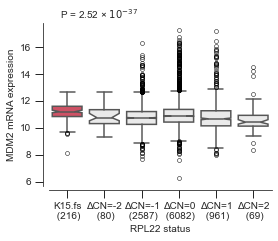

In [51]:
plot_rpl22(merged_tcga_info[["RPL22_status"]], merged_tcga_info["MDM2_mRNA"], "MDM2 mRNA expression")

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


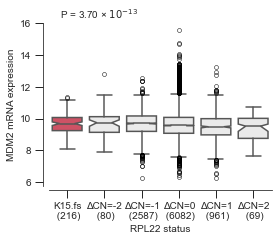

In [52]:
plot_rpl22(merged_tcga_info[["RPL22_status"]], merged_tcga_info["MDM4_mRNA"], "MDM2 mRNA expression")

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


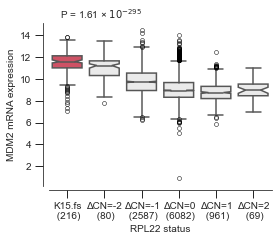

In [53]:
plot_rpl22(merged_tcga_info[["RPL22_status"]], merged_tcga_info["RPL22L1_mRNA"], "MDM2 mRNA expression")

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


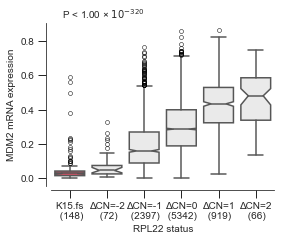

In [54]:
plot_rpl22(merged_tcga_info[["RPL22_status"]], merged_tcga_info["RPL22L1_exon_3A_inclusion"], "MDM2 mRNA expression")

plt.savefig(
    "../plots/rpl22l1-exon-3a_rpl22_tcga.pdf", bbox_inches="tight", transparent=True
)

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


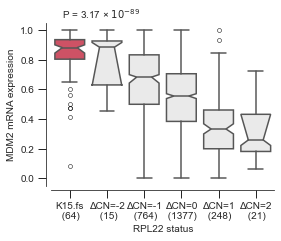

In [55]:
plot_rpl22(merged_tcga_info[["RPL22_status"]], merged_tcga_info["MDM4_exon_6_inclusion"], "MDM2 mRNA expression")

plt.savefig(
    "../plots/rpl22l1-exon-3a_rpl22_tcga.pdf", bbox_inches="tight", transparent=True
)

In [57]:
rpl22_mdm4 = pd.concat(
    [
        tcga_splicing[
            "RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
        ]
        .rename("RPL22L1_3A")
        .dropna(),
        tcga_cn_thresholded["RPL22"].dropna(),
    ],
    join="inner",
    axis=1,
)

rpl22_neutral = rpl22_mdm4[rpl22_mdm4["RPL22"] == 0]

# TCGA correlations

In [28]:
MIN_SAMPLES = 100

mdm4_6_exonusage_overall_corrs = pd.read_csv(
    "../data/supplementary/S4-f_mdm4-6-exonusage-overall-corrs.txt",
    sep="\t",
    index_col=0,
)

mdm4_6_exonusage_overall_corrs["label"] = mdm4_6_exonusage_overall_corrs["b_col"].apply(
    lambda x: f"{format_gene_map[x.split('.')[0]].split('_')[0]}_{x.split('_')[-1]}"
)

mdm4_6_exonusage_overall_corrs = mdm4_6_exonusage_overall_corrs[
    mdm4_6_exonusage_overall_corrs["n"] >= MIN_SAMPLES
]
mdm4_6_exonusage_overall_corrs = mdm4_6_exonusage_overall_corrs[
    mdm4_6_exonusage_overall_corrs["spearman"] < 1
]

/Users/kevinhu/Library/Caches/pypoetry/virtualenvs/kevinhu-Rgu4vvcg-py3.8/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<AxesSubplot:>

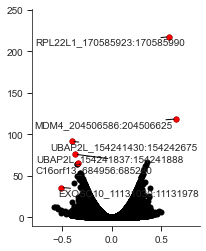

In [40]:
plt.figure(figsize=(3, 4))

labels_mask = mdm4_6_exonusage_overall_corrs["qval"] > 70

labels_mask = labels_mask | (
    (mdm4_6_exonusage_overall_corrs["spearman"] < 0)
    & (mdm4_6_exonusage_overall_corrs["qval"] > 65)
)
labels_mask = labels_mask | (
    (mdm4_6_exonusage_overall_corrs["qval"] > 25)
    & (mdm4_6_exonusage_overall_corrs["spearman"] < -0.5)
)

many.visuals.dense_plot(
    mdm4_6_exonusage_overall_corrs["spearman"],
    mdm4_6_exonusage_overall_corrs["qval"],
    text_adjust=True,
    labels_mask=labels_mask,
    labels=mdm4_6_exonusage_overall_corrs["label"],
    colormap=None,
)

## Overall correlations

In [90]:
def volcano(corrs):
    corrs = corrs.sort_values(by="pval")
    corrs["qval"] = multipletests(10 ** (-corrs["pval"]), alpha=0.01, method="fdr_bh")[
        1
    ]

    labels = pd.Series(corrs.index.map(lambda x: x.split("_")[0]), index=corrs.index)

    pos_ranks = corrs[corrs["corr"] > 0]["qval"].rank()
    neg_ranks = corrs[corrs["corr"] < 0]["qval"].rank()
    ranks = pd.concat([pos_ranks, neg_ranks])

    corrs["qval_rank"] = ranks

    pos_ranks = (-corrs[corrs["corr"] > 0]["corr"]).rank()
    neg_ranks = corrs[corrs["corr"] < 0]["corr"].rank()
    ranks = pd.concat([pos_ranks, neg_ranks])

    corrs["corr_rank"] = ranks

    ranks = pd.concat([pos_ranks, neg_ranks])

    huy.dense_plot(
        corrs["corr"],
        -np.log10(corrs["qval"]),
        labels_mask=(corrs["corr_rank"] < 6) | (corrs["qval_rank"] < 6),
        labels=labels,
        adjust=False,
        c="black",
    )

    plt.xlabel("Spearman correlation")
    plt.ylabel("-log10(q-value)")

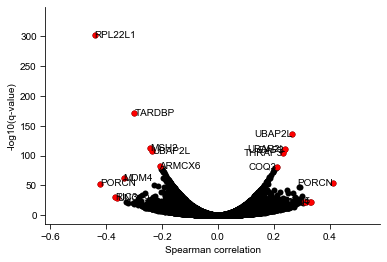

In [111]:
volcano(rpl22_cn_splicing)
plt.savefig(
    "../plots/RPL22_cn_vs_splicing.pdf", bbox_inches="tight", transparent=True, dpi=512
)

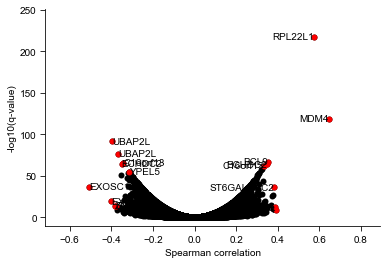

In [110]:
volcano(mdm4_cosplicing)
plt.savefig(
    "../plots/MDM4_cosplicing.pdf", bbox_inches="tight", transparent=True, dpi=512
)

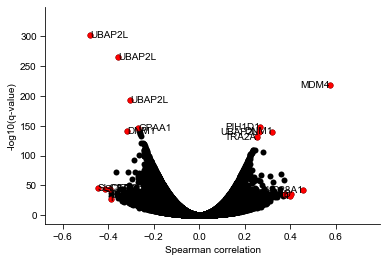

In [109]:
volcano(rpl22l1_cosplicing)
plt.savefig(
    "../plots/RPL22L1_cosplicing.pdf", bbox_inches="tight", transparent=True, dpi=512
)

# RPL22 alterations by primary site

In [169]:
rpl22_subtype_info = rpl22_info.join(
    tcga_sample_info["abbreviated_disease"], how="inner"
)

subtype_proportions = rpl22_subtype_info.groupby(["abbreviated_disease"])[
    "RPL22_status"
].value_counts()
subtype_proportions = subtype_proportions.unstack().fillna(0)

subtype_totals = subtype_proportions.sum(axis=1)

subtype_proportions = subtype_proportions.div(subtype_totals, axis=0) * 100
subtype_proportions["total"] = subtype_totals.astype(int)

altered_classes = [
    "ΔCN=-1",
    "ΔCN=-2",
    "K15.fs",
]

subtype_proportions["altered_proportion"] = subtype_proportions[altered_classes].sum(
    axis=1
)
subtype_proportions = subtype_proportions.sort_values(
    by="altered_proportion", ascending=False
)

subtype_proportions["display_disease"] = subtype_proportions.index
subtype_proportions["display_disease"] = (
    subtype_proportions["display_disease"]
    + " ("
    + subtype_proportions["total"].astype(str)
    + ")"
)

subtype_proportions = subtype_proportions[subtype_proportions["total"] >= 50]

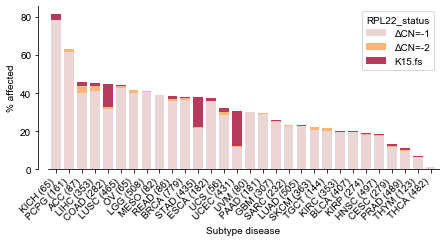

In [182]:
plt.figure(figsize=(7, 3))

ax = plt.subplot(111)

subtype_proportions.plot(
    x="display_disease",
    y=altered_classes,
    kind="bar",
    stacked=True,
    cmap=mpl.colors.ListedColormap(["#ebd5d5", "#fab57a", "#b83b5e"]),
    ax=ax,
    width=0.75,
)

plt.xlabel("Subtype disease")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("axes", -0.025))

plt.xticks(rotation=45, ha="right")

plt.ylabel("% affected")

plt.savefig(
    "../plots/rpl22_subtype_distribution.pdf", bbox_inches="tight", transparent=True
)

# RPL22 boxplots

In [85]:
rpl22_mdm4_merged = pd.concat(
    [
        rpl22_info,
        tcga_splicing[
            "MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
        ].rename("MDM4_exon_6"),
        tcga_sample_info,
    ],
    axis=1,
    sort=True,
)

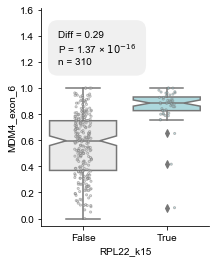

In [92]:
select_type = rpl22_mdm4_merged[rpl22_mdm4_merged["abbreviated_disease"] == "STAD"]
select_type = select_type.dropna(subset=["RPL22_k15", "MDM4_exon_6"], how="any")

huy.two_dists(select_type["MDM4_exon_6"], select_type["RPL22_k15"], summary_type="box")

# CCLE

## RPPA correlations

In [7]:
mdm4_rppa = pd.concat(
    [
        merged_ccle_info["MDM4_ENSG00000198625.8_mRNA"].rename("MDM4_genex"),
        merged_ccle_info["MDM4_mean_chr1_204506558_204506625_ENSG00000198625.8_exonusage"].rename("MDM4_exon_6"),
        merged_ccle_info["MDM4_RPPA_protein"].rename("MDM4_protein"),
    ],
    axis=1,
    sort=True,
)

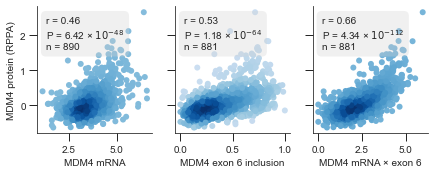

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(7, 7 / 3), sharey=True)

text_pos = (0.075, 0.925)

ax = axes[0]
many.visuals.dense_regression(
    mdm4_rppa["MDM4_genex"],
    mdm4_rppa["MDM4_protein"],
    "pearson",
    ax=ax,
    text_pos=text_pos,
    colormap="Blues",
    cmap_offset=0.5,
)
ax.set_ylabel("MDM4 protein (RPPA)")
ax.set_xlabel("MDM4 mRNA")

ax = axes[1]
many.visuals.dense_regression(
    mdm4_rppa["MDM4_exon_6"],
    mdm4_rppa["MDM4_protein"],
    "pearson",
    ax=ax,
    text_pos=text_pos,
    colormap="Blues",
    cmap_offset=0.5,
)
ax.set_xlabel("MDM4 exon 6 inclusion")

mult = np.log2(2 ** mdm4_rppa["MDM4_genex"] * mdm4_rppa["MDM4_exon_6"] + 1)

ax = axes[2]
many.visuals.dense_regression(
    mult,
    mdm4_rppa["MDM4_protein"],
    "pearson",
    ax=ax,
    text_pos=text_pos,
    colormap="Blues",
    cmap_offset=0.5,
)

ax.set_xlabel("MDM4 mRNA × exon 6")

plt.savefig(
    "../plots/MDM4_RPPA_correlations.pdf",
    bbox_inches="tight",
    transparent=True,
    dpi=512,
)

## Mass-spec correlations

In [17]:
mdm4_ms = pd.concat(
    [
        merged_ccle_info["MDM4_ENSG00000198625.8_mRNA"].rename("MDM4_genex"),
        merged_ccle_info["MDM4_mean_chr1_204506558_204506625_ENSG00000198625.8_exonusage"].rename("MDM4_exon_6"),
        merged_ccle_info["MDM4_MS_protein"].rename("MDM4_protein"),
    ],
    axis=1,
    sort=True,
)

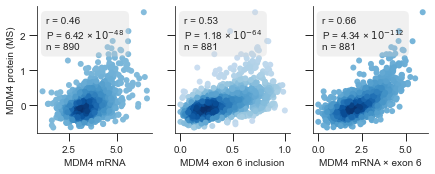

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(7, 7 / 3), sharey=True)

text_pos = (0.075, 0.925)

ax = axes[0]
many.visuals.dense_regression(
    mdm4_rppa["MDM4_genex"],
    mdm4_rppa["MDM4_protein"],
    "pearson",
    ax=ax,
    text_pos=text_pos,
    colormap="Blues",
    cmap_offset=0.5,
)
ax.set_ylabel("MDM4 protein (MS)")
ax.set_xlabel("MDM4 mRNA")

ax = axes[1]
many.visuals.dense_regression(
    mdm4_rppa["MDM4_exon_6"],
    mdm4_rppa["MDM4_protein"],
    "pearson",
    ax=ax,
    text_pos=text_pos,
    colormap="Blues",
    cmap_offset=0.5,
)
ax.set_xlabel("MDM4 exon 6 inclusion")

mult = np.log2(2 ** mdm4_rppa["MDM4_genex"] * mdm4_rppa["MDM4_exon_6"] + 1)

ax = axes[2]
many.visuals.dense_regression(
    mult,
    mdm4_rppa["MDM4_protein"],
    "pearson",
    ax=ax,
    text_pos=text_pos,
    colormap="Blues",
    cmap_offset=0.5,
)

ax.set_xlabel("MDM4 mRNA × exon 6")

plt.savefig(
    "../plots/MDM4_MS_correlations.pdf",
    bbox_inches="tight",
    transparent=True,
    dpi=512,
)